In [1]:
#import timeit

import matplotlib.pylab as pylab
import numpy as np
#import numpy.fft as fft
from   PIL import Image
from   scipy import ndimage, misc, signal
import scipy.fftpack as fp
#from   scipy.stats import signaltonoise # deprecated
#from   skimage import data, img_as_float
from   skimage.color import rgb2gray
from   skimage.io import imread, imshow, show
#from   skimage.transform import rescale

#%matplotlib inline

In [2]:
IMG = '../../../images'

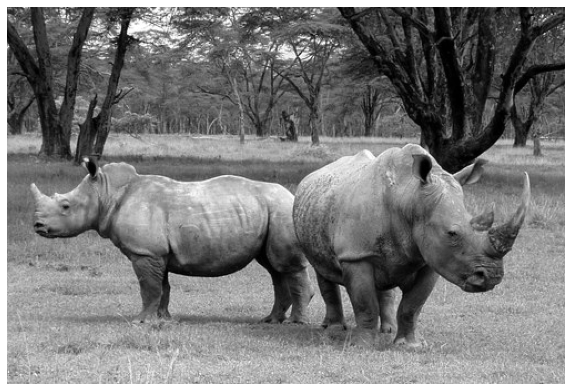

In [3]:
im = np.array(Image.open(f'{IMG}/rhino.jpg').convert('L'))
pylab.figure(figsize=(10, 10))
pylab.imshow(im, cmap=pylab.cm.gray)
pylab.axis('off');

/Users/dsatterthwaite/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


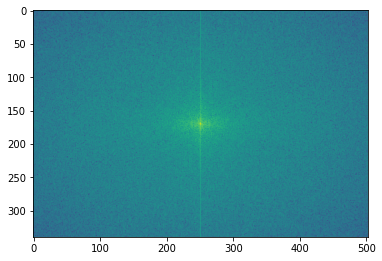

In [13]:
freq = fp.fft2(im)
w, h = freq.shape
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
pylab.figure(figsize=(6, 6))
pylab.imshow((20 * np.log10(0.1 + freq2)).astype(int));

/Users/dsatterthwaite/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


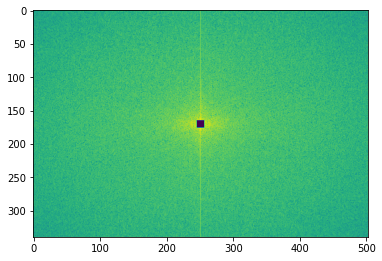

In [14]:
# Apply HPF
hw = w // 2
hh = h // 2
# select all but first 10x10 (low) freqs
freq2[hw - 5:hw + 6, hh - 5:hh + 6] = 0 
pylab.figure(figsize=(6, 6))
pylab.imshow((20 * np.log10(0.1 + freq2)).astype(int));

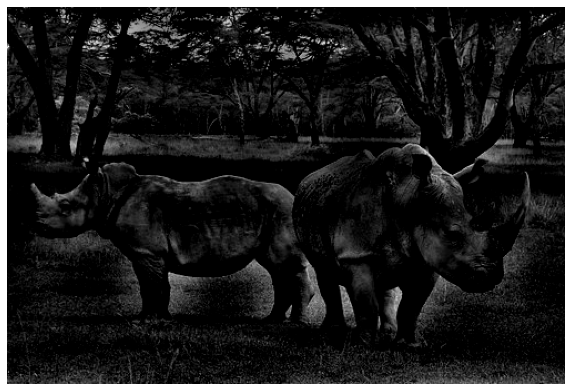

In [15]:
im1 = np.clip(fp.ifft2(fp.ifftshift(freq2)).real, 0, 255)
pylab.figure(figsize=(10, 10))
pylab.imshow(im1, cmap='gray')
pylab.axis('off');